<a href="https://colab.research.google.com/github/moiroudelliott/hough/blob/main/Hough_polaire_(Sans_proche).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive


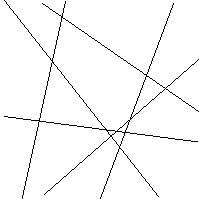

In [ ]:
# Les modules :

from google.colab import drive
import sys
import math
import cv2 as cv
import numpy as np
import math as m
from google.colab.patches import cv2_imshow

# Accès au fichiers du drives :

drive.mount('/content/drive')

# Importation de l'image :, 

path='/content/drive/My Drive/python/test5.png'
img = cv.imread(path)
cv2_imshow(img)

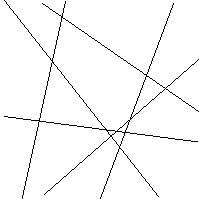

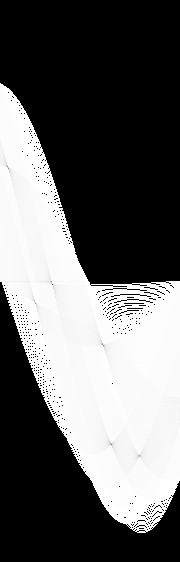

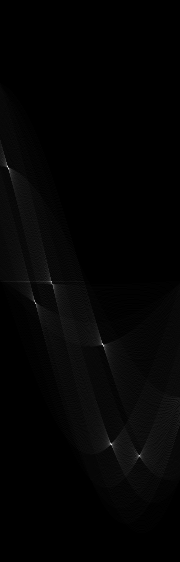

[(111, 444), (8, 168), (102, 344), (139, 455), (103, 345), (7, 166)]


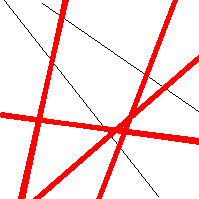

In [ ]:
def houghLine(image, incr):
  # On récupère la taille de l'image
  haut = len(image)
  larg = len(image[0])
  # On calcule la distance max en utilisant le théorème de pythagore
  dMax = int(m.sqrt(haut ** 2 + larg ** 2))
  # On fait un tableau de 180 radiant entre pi/2 et -pi/2
  thetas = np.deg2rad(np.arange(-90, 90))
  # On crée notre accumulateur qui fera 2 fois distance maximum x 180° (de -90 à 90)
  accumulator = np.zeros((dMax * 2, len(thetas)), dtype=np.uint8)

  # On boucle ensuite dans tous les pixels de l'image
  for y in range(haut):
      for x in range(larg):
        # Quand on trouve un pixel foncé on continue
        if img[y][x][0] < 100:
          # On boucle dans les x de l'accumulateur
          for o in range(len(thetas)):
            # On calcule le rayon r avec la formule r = x*cos(o)+y*sin(o)
            r = x * m.cos(thetas[o]) + y * m.sin(thetas[o])
            # Ensuite nous incrémentons l'accumulateur avec incr
            accumulator[int(r) + dMax, o] += incr
  return accumulator

def coordonneesMax(img, n):

  # On définis comme mémoire d'origine un tableau de n point (0, 0).
  res=[(0, 0)] * n

  # Puis nous allons boucler sur tous les pixels de l'image.
  for y in range(len(img)):
    for x in range(len(img[0])):
      # on définis le minimum à l'indice 0
      min = 0
      # On boucle sur la taille longueur du tableau -1
      for i in range(len(res) - 1):
          # On compare le point stocker dans res à l'indice minimum avec le point dans res à l'indice i + 1
          if img[res[min][1]][res[min][0]] > img[res[i + 1][1]][res[i + 1][0]]:
            # On met à jour l'indice min
            min = i + 1
      # Si le point aux indices est plus clair que celui qu'on avais dans res à l'indice min, on le remplace.
      if img[y][x] > img[res[min][1]][res[min][0]]:
        res[min] = (x, y)

  return res

cv2_imshow(img)

res = houghLine(img, 255)
cv2_imshow(res)
res2 = houghLine(img, 2)
cv2_imshow(res2)

# On récupère la taille de l'image
haut = len(img)
larg = len(img[1])

# On récupère les coordonnées des pixels les plus clair de l'accumulateur
c_max = coordonneesMax(res2, 6)
print(c_max)

# On en sort les thetas en repassant les degrés en radiants et les rayons
co_pol = []
for co in c_max:
  theta = np.deg2rad(co[0] - 90)
  r = co[1] - int(m.sqrt(haut ** 2 + larg ** 2))
  co_pol.append((theta, r))

# On calcule 2 y par coordonnées en utilisant la formule y = (-cos(O)/sin(O))*x+r/sin(O)
tab_y = []
for co in co_pol:
  y = int((( - m.cos(co[0])) / m.sin(co[0])) + co[1] / m.sin(co[0]))
  y_max = int((( - m.cos(co[0])) / m.sin(co[0])) * larg + co[1] / m.sin(co[0]))
  tab_y.append((y, y_max))

# On trace des lignes sur les coordonnées trouvées
for line in tab_y:
  cv.line(img, (1, line[0]), (larg, line[1]), (0, 0, 255), 3)

cv2_imshow(img)